In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [3]:
in_sample_dir = Path("../../modelling/in-sample")
sorted(in_sample_dir.iterdir())

[PosixPath('../../modelling/in-sample/.ipynb_checkpoints'),
 PosixPath('../../modelling/in-sample/2018-06-01.csv'),
 PosixPath('../../modelling/in-sample/2018-06-04.csv'),
 PosixPath('../../modelling/in-sample/2018-06-05.csv'),
 PosixPath('../../modelling/in-sample/2018-06-06.csv'),
 PosixPath('../../modelling/in-sample/2018-06-07.csv'),
 PosixPath('../../modelling/in-sample/2018-06-08.csv'),
 PosixPath('../../modelling/in-sample/2018-06-11.csv'),
 PosixPath('../../modelling/in-sample/2018-06-12.csv'),
 PosixPath('../../modelling/in-sample/2018-06-13.csv'),
 PosixPath('../../modelling/in-sample/2018-06-14.csv'),
 PosixPath('../../modelling/in-sample/2018-06-15.csv'),
 PosixPath('../../modelling/in-sample/2018-06-18.csv'),
 PosixPath('../../modelling/in-sample/2018-06-19.csv'),
 PosixPath('../../modelling/in-sample/2018-06-20.csv'),
 PosixPath('../../modelling/in-sample/2018-06-21.csv'),
 PosixPath('../../modelling/in-sample/2018-06-22.csv'),
 PosixPath('../../modelling/in-sample/2018-0

In [4]:
in_data = pd.concat(pd.read_csv(file) for file in in_sample_dir.glob("*.csv"))
in_data
in_data = in_data.dropna().reset_index(drop=True)
in_data = in_data.assign(norm_med_spread_1 = lambda x : np.log(1 + x.med_spread_1/x.price))
in_data = in_data.assign(log_volume = lambda x : np.log(1 + x.volume))
in_data = in_data.assign(log_price = lambda x : np.log(1 + x.price))

In [5]:
in_data = in_data.assign(rec_avg_market_size = lambda x : 1/(x.avg_market_size)**2)
in_data

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,primary_route,industry_group,med_spread_1,med_spread_2,med_spread_3,med_spread_4,norm_med_spread_1,log_volume,log_price,rec_avg_market_size
0,2,2018-09-06,140047.0,8.03,53.2032,0.481377,197.51,224.762331,NYSE,Healthcare-Services,0.101404,0.041143,0.023961,0.013841,0.012549,11.849740,2.200552,0.000020
1,4,2018-09-06,4152728.0,39.67,29.1968,1.245923,18268.40,618.365490,NASDAQ,Airlines,0.021556,0.013574,0.010000,0.010000,0.000543,15.239276,3.705491,0.000003
2,5,2018-09-06,147.0,63.00,80.7808,-0.759050,101.64,324.691507,AMEX,Diversified Finan Serv,8.174941,6.494445,4.502186,3.928128,0.122006,4.997212,4.158883,0.000009
3,7,2018-09-06,335137.0,50.46,30.5344,1.404075,3490.61,181.806869,NYSE,Commercial Services,0.343327,0.111939,0.042675,0.013786,0.006781,12.722298,3.940805,0.000030
4,8,2018-09-06,679249.0,34.25,59.6928,2.722915,674.66,236.086294,NASDAQ,Electronics,0.133674,0.089788,0.053206,0.019344,0.003895,13.428745,3.562466,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660251,8423,2018-10-08,316778.0,24.90,41.0432,1.350307,635.43,524.290295,NASDAQ,Retail,0.301332,0.096494,0.049769,0.036930,0.012029,12.665960,3.254243,0.000004
660252,8424,2018-10-08,1598045.0,21.16,63.2768,1.822933,2279.33,418.827669,NYSE,Software,0.110641,0.078839,0.048854,0.025086,0.005215,14.284292,3.098289,0.000006
660253,8425,2018-10-08,1835585.0,41.82,35.4368,1.670933,8442.02,278.620600,NASDAQ,Internet,0.094725,0.056245,0.019761,0.010000,0.002263,14.422874,3.757005,0.000013
660254,8426,2018-10-08,100723.5,13.81,58.4576,1.818244,441.37,207.220727,NYSE,Biotechnology,0.219852,0.144525,0.079039,0.047397,0.015794,11.520144,2.695303,0.000023


In [6]:
in_data = in_data.assign(sqrd_volatility = lambda x : 1/(x.volatility))
in_data

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,primary_route,industry_group,med_spread_1,med_spread_2,med_spread_3,med_spread_4,norm_med_spread_1,log_volume,log_price,rec_avg_market_size,sqrd_volatility
0,2,2018-09-06,140047.0,8.03,53.2032,0.481377,197.51,224.762331,NYSE,Healthcare-Services,0.101404,0.041143,0.023961,0.013841,0.012549,11.849740,2.200552,0.000020,0.018796
1,4,2018-09-06,4152728.0,39.67,29.1968,1.245923,18268.40,618.365490,NASDAQ,Airlines,0.021556,0.013574,0.010000,0.010000,0.000543,15.239276,3.705491,0.000003,0.034250
2,5,2018-09-06,147.0,63.00,80.7808,-0.759050,101.64,324.691507,AMEX,Diversified Finan Serv,8.174941,6.494445,4.502186,3.928128,0.122006,4.997212,4.158883,0.000009,0.012379
3,7,2018-09-06,335137.0,50.46,30.5344,1.404075,3490.61,181.806869,NYSE,Commercial Services,0.343327,0.111939,0.042675,0.013786,0.006781,12.722298,3.940805,0.000030,0.032750
4,8,2018-09-06,679249.0,34.25,59.6928,2.722915,674.66,236.086294,NASDAQ,Electronics,0.133674,0.089788,0.053206,0.019344,0.003895,13.428745,3.562466,0.000018,0.016752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660251,8423,2018-10-08,316778.0,24.90,41.0432,1.350307,635.43,524.290295,NASDAQ,Retail,0.301332,0.096494,0.049769,0.036930,0.012029,12.665960,3.254243,0.000004,0.024365
660252,8424,2018-10-08,1598045.0,21.16,63.2768,1.822933,2279.33,418.827669,NYSE,Software,0.110641,0.078839,0.048854,0.025086,0.005215,14.284292,3.098289,0.000006,0.015804
660253,8425,2018-10-08,1835585.0,41.82,35.4368,1.670933,8442.02,278.620600,NASDAQ,Internet,0.094725,0.056245,0.019761,0.010000,0.002263,14.422874,3.757005,0.000013,0.028219
660254,8426,2018-10-08,100723.5,13.81,58.4576,1.818244,441.37,207.220727,NYSE,Biotechnology,0.219852,0.144525,0.079039,0.047397,0.015794,11.520144,2.695303,0.000023,0.017106


In [7]:
in_data = in_data.drop("sqrd_volatility",axis=1)

In [8]:
in_data = in_data.assign(sqrd_volatility = lambda x : np.log((x.volatility)**2 + x.volatility))
in_data

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,primary_route,industry_group,med_spread_1,med_spread_2,med_spread_3,med_spread_4,norm_med_spread_1,log_volume,log_price,rec_avg_market_size,sqrd_volatility
0,2,2018-09-06,140047.0,8.03,53.2032,0.481377,197.51,224.762331,NYSE,Healthcare-Services,0.101404,0.041143,0.023961,0.013841,0.012549,11.849740,2.200552,0.000020,7.966858
1,4,2018-09-06,4152728.0,39.67,29.1968,1.245923,18268.40,618.365490,NASDAQ,Airlines,0.021556,0.013574,0.010000,0.010000,0.000543,15.239276,3.705491,0.000003,6.781795
2,5,2018-09-06,147.0,63.00,80.7808,-0.759050,101.64,324.691507,AMEX,Diversified Finan Serv,8.174941,6.494445,4.502186,3.928128,0.122006,4.997212,4.158883,0.000009,8.795782
3,7,2018-09-06,335137.0,50.46,30.5344,1.404075,3490.61,181.806869,NYSE,Commercial Services,0.343327,0.111939,0.042675,0.013786,0.006781,12.722298,3.940805,0.000030,6.869933
4,8,2018-09-06,679249.0,34.25,59.6928,2.722915,674.66,236.086294,NASDAQ,Electronics,0.133674,0.089788,0.053206,0.019344,0.003895,13.428745,3.562466,0.000018,8.195036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660251,8423,2018-10-08,316778.0,24.90,41.0432,1.350307,635.43,524.290295,NASDAQ,Retail,0.301332,0.096494,0.049769,0.036930,0.012029,12.665960,3.254243,0.000004,7.453323
660252,8424,2018-10-08,1598045.0,21.16,63.2768,1.822933,2279.33,418.827669,NYSE,Software,0.110641,0.078839,0.048854,0.025086,0.005215,14.284292,3.098289,0.000006,8.310718
660253,8425,2018-10-08,1835585.0,41.82,35.4368,1.670933,8442.02,278.620600,NASDAQ,Internet,0.094725,0.056245,0.019761,0.010000,0.002263,14.422874,3.757005,0.000013,7.163330
660254,8426,2018-10-08,100723.5,13.81,58.4576,1.818244,441.37,207.220727,NYSE,Biotechnology,0.219852,0.144525,0.079039,0.047397,0.015794,11.520144,2.695303,0.000023,8.153565


In [9]:
in_data["norm_med_spread_1"].max()

15.486147824571407

In [10]:
in_data.loc[lambda x : x["norm_med_spread_1"] == in_data["norm_med_spread_1"].max()]

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,primary_route,industry_group,med_spread_1,med_spread_2,med_spread_3,med_spread_4,norm_med_spread_1,log_volume,log_price,rec_avg_market_size,sqrd_volatility
487681,4692,2018-06-27,2744.0,0.0404,8.7424,-0.037489,0.29,805.780707,NASDAQ,Holding Companies-Divers,214748.346986,107461.048124,102350.938225,4.878709,15.486148,7.917536,0.039605,0.000002,4.444672


In [11]:
in_data = in_data.drop(487681).reset_index(drop=True)

<Axes: xlabel='exp_beta', ylabel='norm_med_spread_1'>

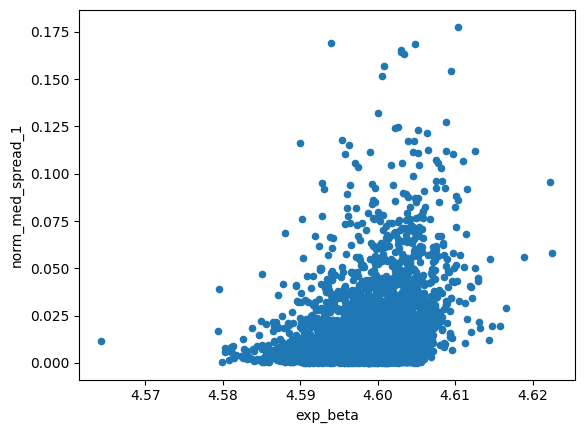

In [12]:
in_data = in_data.assign(exp_beta = lambda x : np.log(100-x.spx_beta))
in_data.dropna()
in_data
in_data.query("norm_med_spread_1 < 0.18 and trade_date == '2018-06-27'").plot.scatter("exp_beta","norm_med_spread_1")

<Axes: xlabel='rec_market_cap', ylabel='norm_med_spread_1'>

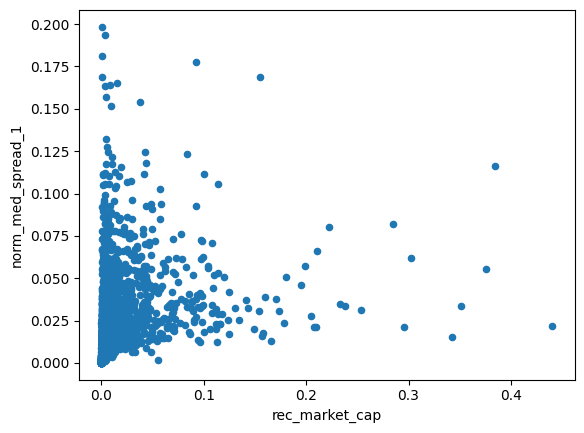

In [13]:
in_data = in_data.assign(rec_market_cap = lambda x : 1/(x.market_cap))
in_data.dropna()
in_data
in_data.query("norm_med_spread_1 < 0.2 and trade_date == '2018-06-27'").plot.scatter("rec_market_cap","norm_med_spread_1")

<Axes: xlabel='rec_shares_outstanding', ylabel='norm_med_spread_1'>

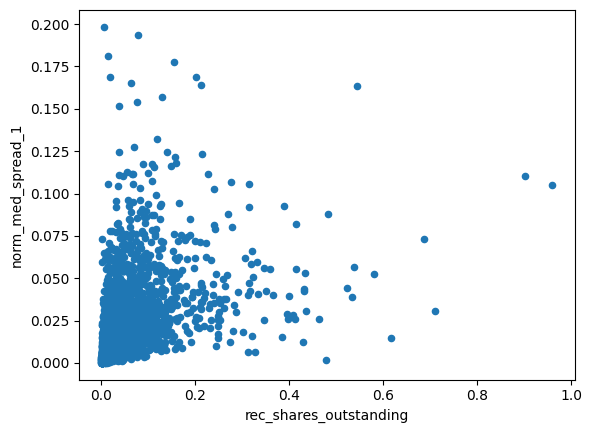

In [14]:
in_data = in_data.assign(rec_shares_outstanding = lambda x : np.log(1 + x.price/x.market_cap))
in_data.dropna()
in_data
in_data.query("norm_med_spread_1 < 0.2 and trade_date == '2018-06-27'").plot.scatter("rec_shares_outstanding","norm_med_spread_1")

In [15]:
in_data[["primary_route","industry_group"]]

,primary_route,industry_group
0,NYSE,Healthcare-Services
1,NASDAQ,Airlines
2,AMEX,Diversified Finan Serv
3,NYSE,Commercial Services
4,NASDAQ,Electronics
...,...,...
660250,NASDAQ,Retail
660251,NYSE,Software
660252,NASDAQ,Internet
660253,NYSE,Biotechnology


In [16]:
enc_data = in_data.copy()
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(in_data[["primary_route","industry_group"]]))

OH_cols.index = in_data.index

num_in_data = in_data.drop(["primary_route","industry_group"], axis=1)

OH_in_data = pd.concat([num_in_data, OH_cols], axis=1)

OH_in_data.columns = OH_in_data.columns.astype(str)


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
OH_in_data

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,med_spread_1,med_spread_2,...,69,70,71,72,73,74,75,76,77,78
0,2,2018-09-06,140047.0,8.03,53.2032,0.481377,197.51,224.762331,0.101404,0.041143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2018-09-06,4152728.0,39.67,29.1968,1.245923,18268.40,618.365490,0.021556,0.013574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,2018-09-06,147.0,63.00,80.7808,-0.759050,101.64,324.691507,8.174941,6.494445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2018-09-06,335137.0,50.46,30.5344,1.404075,3490.61,181.806869,0.343327,0.111939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2018-09-06,679249.0,34.25,59.6928,2.722915,674.66,236.086294,0.133674,0.089788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660250,8423,2018-10-08,316778.0,24.90,41.0432,1.350307,635.43,524.290295,0.301332,0.096494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660251,8424,2018-10-08,1598045.0,21.16,63.2768,1.822933,2279.33,418.827669,0.110641,0.078839,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660252,8425,2018-10-08,1835585.0,41.82,35.4368,1.670933,8442.02,278.620600,0.094725,0.056245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660253,8426,2018-10-08,100723.5,13.81,58.4576,1.818244,441.37,207.220727,0.219852,0.144525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

OH_in_data = OH_in_data.assign(weighing = lambda x : ((x.price)*(x.volume))**0.3)
OH_in_data.dropna()
OH_in_data

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,med_spread_1,med_spread_2,...,70,71,72,73,74,75,76,77,78,weighing
0,2,2018-09-06,140047.0,8.03,53.2032,0.481377,197.51,224.762331,0.101404,0.041143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.357707
1,4,2018-09-06,4152728.0,39.67,29.1968,1.245923,18268.40,618.365490,0.021556,0.013574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.768704
2,5,2018-09-06,147.0,63.00,80.7808,-0.759050,101.64,324.691507,8.174941,6.494445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.488072
3,7,2018-09-06,335137.0,50.46,30.5344,1.404075,3490.61,181.806869,0.343327,0.111939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.384186
4,8,2018-09-06,679249.0,34.25,59.6928,2.722915,674.66,236.086294,0.133674,0.089788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.183577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660250,8423,2018-10-08,316778.0,24.90,41.0432,1.350307,635.43,524.290295,0.301332,0.096494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.242834
660251,8424,2018-10-08,1598045.0,21.16,63.2768,1.822933,2279.33,418.827669,0.110641,0.078839,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.439316
660252,8425,2018-10-08,1835585.0,41.82,35.4368,1.670933,8442.02,278.620600,0.094725,0.056245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.031826
660253,8426,2018-10-08,100723.5,13.81,58.4576,1.818244,441.37,207.220727,0.219852,0.144525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.662226


In [19]:
OH_in_data = OH_in_data.assign(liquidity = lambda x : np.log(1 + (x.price)*(x.volume)))
OH_in_data = OH_in_data.assign(rec_liquidity = lambda x :1/(1 + (x.price)*(x.volume))**0.3)
OH_in_data = OH_in_data.assign(rec_vol = lambda x : 1/(1 + x.volume))
OH_in_data.dropna()
OH_in_data

,index,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,med_spread_1,med_spread_2,...,73,74,75,76,77,78,weighing,liquidity,rec_liquidity,rec_vol
0,2,2018-09-06,140047.0,8.03,53.2032,0.481377,197.51,224.762331,0.101404,0.041143,...,0.0,0.0,0.0,0.0,0.0,0.0,65.357707,13.932919,0.015300,7.140409e-06
1,4,2018-09-06,4152728.0,39.67,29.1968,1.245923,18268.40,618.365490,0.021556,0.013574,...,0.0,0.0,0.0,0.0,0.0,0.0,291.768704,18.919871,0.003427,2.408055e-07
2,5,2018-09-06,147.0,63.00,80.7808,-0.759050,101.64,324.691507,8.174941,6.494445,...,0.0,0.0,0.0,0.0,0.0,0.0,15.488072,9.133675,0.064564,6.756757e-03
3,7,2018-09-06,335137.0,50.46,30.5344,1.404075,3490.61,181.806869,0.343327,0.111939,...,0.0,0.0,0.0,0.0,0.0,0.0,147.384186,16.643476,0.006785,2.983845e-06
4,8,2018-09-06,679249.0,34.25,59.6928,2.722915,674.66,236.086294,0.133674,0.089788,...,0.0,0.0,0.0,0.0,0.0,0.0,162.183577,16.962430,0.006166,1.472212e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660250,8423,2018-10-08,316778.0,24.90,41.0432,1.350307,635.43,524.290295,0.301332,0.096494,...,0.0,0.0,0.0,0.0,0.0,0.0,117.242834,15.880824,0.008529,3.156775e-06
660251,8424,2018-10-08,1598045.0,21.16,63.2768,1.822933,2279.33,418.827669,0.110641,0.078839,...,0.0,0.0,0.0,0.0,0.0,0.0,181.439316,17.336404,0.005511,6.257642e-07
660252,8425,2018-10-08,1835585.0,41.82,35.4368,1.670933,8442.02,278.620600,0.094725,0.056245,...,0.0,0.0,0.0,0.0,0.0,0.0,232.031826,18.156248,0.004310,5.447852e-07
660253,8426,2018-10-08,100723.5,13.81,58.4576,1.818244,441.37,207.220727,0.219852,0.144525,...,0.0,0.0,0.0,0.0,0.0,0.0,69.662226,14.145528,0.014355,9.928071e-06


In [20]:
OH_in_data.columns

Index(['index', 'trade_date', 'volume', 'price', 'volatility', 'spx_beta',
       'market_cap', 'avg_market_size', 'med_spread_1', 'med_spread_2',
       ...
       '73', '74', '75', '76', '77', '78', 'weighing', 'liquidity',
       'rec_liquidity', 'rec_vol'],
      dtype='object', length=103)

In [21]:
in_data_enc_copy = OH_in_data.copy()
OH_in_data = OH_in_data.query("norm_med_spread_1 < 0.2")
OH_in_data = OH_in_data.assign(log_vol = lambda x : np.log(1+x.volatility))
OH_in_data = OH_in_data.assign(log_vol_sqrd = lambda x : np.log(1+(x.volatility)**2))

<Axes: xlabel='exp_sqrd_vol', ylabel='norm_med_spread_1'>

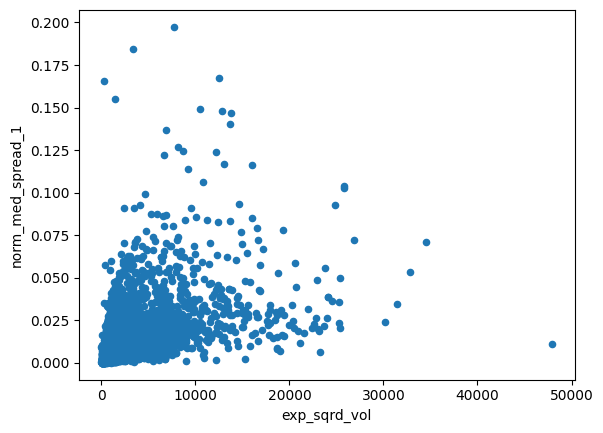

In [22]:
OH_in_data = OH_in_data.assign(exp_sqrd_vol = lambda x : np.exp(x.sqrd_volatility))
OH_in_data.query("trade_date=='2018-09-06'").plot.scatter("exp_sqrd_vol","norm_med_spread_1")

<Axes: xlabel='rec_price', ylabel='norm_med_spread_1'>

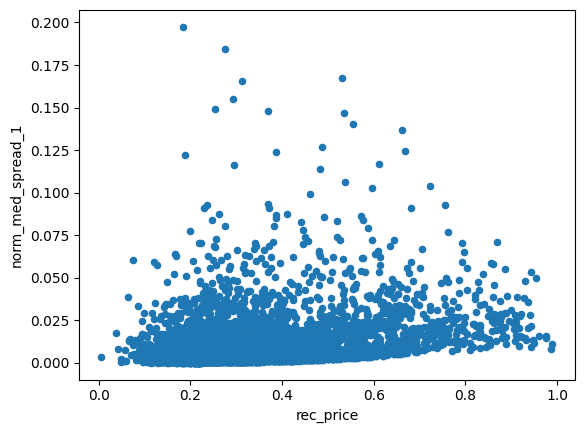

In [23]:
OH_in_data = OH_in_data.assign(rec_price = lambda x : 1/(1+x.price)**0.4)
OH_in_data.query("trade_date=='2018-09-06'").plot.scatter("rec_price","norm_med_spread_1")

<Axes: xlabel='pow_beta', ylabel='norm_med_spread_1'>

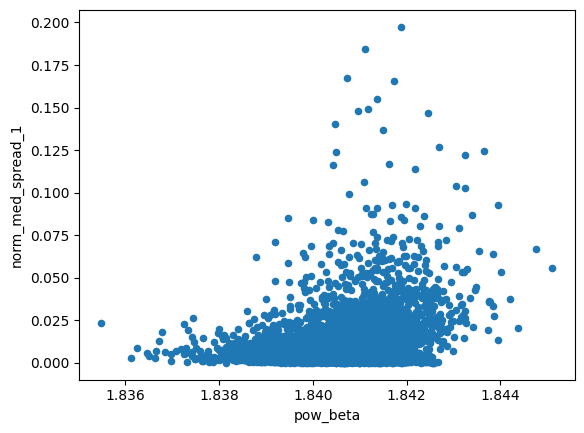

In [24]:
OH_in_data = OH_in_data.assign(pow_beta = lambda x : x.exp_beta**0.4)
OH_in_data.query("trade_date=='2018-09-06'").plot.scatter("pow_beta","norm_med_spread_1")

<Axes: xlabel='rec_volume', ylabel='norm_med_spread_1'>

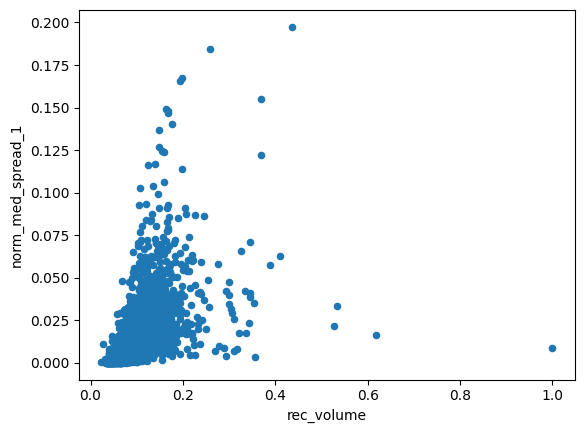

In [25]:
OH_in_data = OH_in_data.assign(rec_volume = lambda x : 1/(1+x.volume)**0.2)
OH_in_data.query("trade_date=='2018-09-06'").plot.scatter("rec_volume","norm_med_spread_1")

In [26]:
X_col = ["spx_beta","volatility","exp_sqrd_vol","rec_shares_outstanding","rec_volume","rec_price","rec_liquidity","pow_beta","avg_market_size",'0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78']
y_col = ["norm_med_spread_1"]
split = int(0.8*len(OH_in_data))
OH_in_data = OH_in_data.reset_index(drop=True)
train,test = OH_in_data[:split],OH_in_data[split:]
X_train = train[X_col]
X_test = test[X_col]
y_train = train[y_col]
y_test = test[y_col]
weights = np.abs(OH_in_data["weighing"][:split])
test_weights = np.abs(OH_in_data["weighing"][split:])

model = LinearRegression(fit_intercept = False)

model.fit(X_train,y_train,sample_weight = weights)

model.coef_


array([[ 1.54546262e-01,  3.63947183e-04, -5.50157114e-07,
         6.05909987e-03,  1.14759217e-01, -2.65016539e-02,
         6.22501874e-01,  9.80962738e+01,  1.01324044e-07,
        -1.66983947e+02, -1.66995044e+02, -1.66985090e+02,
        -1.66981771e+02, -1.66978372e+02, -1.66980637e+02,
        -1.37248144e+01, -1.37251250e+01, -1.37249499e+01,
        -1.37258950e+01, -1.37246612e+01, -1.37247484e+01,
        -1.37244183e+01, -1.37219408e+01, -1.37261672e+01,
        -1.37250907e+01, -1.37246825e+01, -1.37236153e+01,
        -1.37258084e+01, -1.37239572e+01, -1.37239786e+01,
        -1.37240830e+01, -1.37246465e+01, -1.37235857e+01,
        -1.37257517e+01, -1.37237529e+01, -1.37237919e+01,
        -1.37284134e+01, -1.37230368e+01, -1.37253948e+01,
        -1.37239336e+01, -1.37264616e+01, -1.37250425e+01,
        -1.37236130e+01, -1.37246299e+01, -1.37260538e+01,
        -1.37237906e+01, -1.37242989e+01, -1.37244960e+01,
        -1.37302373e+01, -1.37255943e+01, -1.37244012e+0

In [27]:
model.score(X_train,y_train,sample_weight = weights)

0.6415914331695699

In [28]:
model.score(X_test,y_test,sample_weight = test_weights)

0.6279202139908879

In [29]:
out_of_sample_dir = Path("../../modelling/out-of-sample")
sorted(out_of_sample_dir.iterdir())

[PosixPath('../../modelling/out-of-sample/.ipynb_checkpoints'),
 PosixPath('../../modelling/out-of-sample/2019-01-02.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-03.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-04.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-07.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-08.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-09.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-10.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-11.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-14.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-15.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-16.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-17.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-18.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-22.csv'),
 PosixPath('../../modelling/out-of-sample/2019-01-23.csv'),
 PosixPath('../../modelling/out-of-s

In [30]:
out_data = pd.concat(pd.read_csv(file) for file in out_of_sample_dir.glob("*.csv"))
out_data
out_data = out_data.dropna().reset_index(drop=True)
out_data

,index,symbol,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,primary_route,industry_group
0,2,AAC US,2019-01-07,237288.0,1.86,119.1104,0.790057,45.76,706.107379,NYSE,Healthcare-Services
1,4,AAL US,2019-01-07,6644058.0,32.04,48.9536,1.387974,14757.03,453.752444,NASDAQ,Airlines
2,5,AAMC US,2019-01-07,6269.0,29.76,130.6688,0.037652,48.60,196.903984,AMEX,Diversified Finan Serv
3,6,AAME US,2019-01-07,1850.5,2.52,101.3184,0.032237,50.90,470.940331,NASDAQ,Insurance
4,7,AAN US,2019-01-07,397640.5,43.99,43.7760,1.092111,3017.48,155.156181,NYSE,Commercial Services
...,...,...,...,...,...,...,...,...,...,...,...
613970,7564,ZUO US,2019-03-26,1430337.0,20.39,55.4880,2.494586,2212.37,466.582120,NYSE,Software
613971,7565,Z US,2019-03-26,2127298.0,35.86,44.5568,1.595975,7301.97,306.130487,NASDAQ,Internet
613972,7566,ZYME US,2019-03-26,112573.5,15.03,52.8000,0.898682,481.34,240.539755,NYSE,Biotechnology
613973,7567,ZYNE US,2019-03-26,649579.0,5.72,93.0944,2.390717,120.52,667.819120,NASDAQ,Pharmaceuticals


In [31]:
out_data = out_data.assign(rec_volume = lambda x : 1/(1+x.volume)**0.2)
out_data = out_data.assign(rec_price = lambda x : 1/(1+x.price)**0.4)
out_data = out_data.assign(sqrd_volatility = lambda x : np.log((x.volatility)**2 + x.volatility))
out_data = out_data.assign(exp_sqrd_vol = lambda x : np.exp(x.sqrd_volatility))
out_data = out_data.assign(rec_liquidity = lambda x :1/(1 + (x.price)*(x.volume))**0.3)
out_data = out_data.assign(rec_shares_outstanding = lambda x : np.log(1 + x.price/x.market_cap))
out_data = out_data.assign(exp_beta = lambda x : np.log(100-x.spx_beta))
out_data = out_data.assign(pow_beta = lambda x : x.exp_beta**0.4)

out_data

,index,symbol,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,primary_route,industry_group,rec_volume,rec_price,sqrd_volatility,exp_sqrd_vol,rec_liquidity,rec_shares_outstanding,exp_beta,pow_beta
0,2,AAC US,2019-01-07,237288.0,1.86,119.1104,0.790057,45.76,706.107379,NYSE,Healthcare-Services,0.084129,0.656831,9.568462,14306.397788,0.020256,0.039842,4.597238,1.840767
1,4,AAL US,2019-01-07,6644058.0,32.04,48.9536,1.387974,14757.03,453.752444,NASDAQ,Airlines,0.043203,0.246822,7.801967,2445.408553,0.003174,0.002169,4.591193,1.839798
2,5,AAMC US,2019-01-07,6269.0,29.76,130.6688,0.037652,48.60,196.903984,AMEX,Diversified Finan Serv,0.173999,0.253983,9.752956,17205.004093,0.026227,0.477690,4.604794,1.841976
3,6,AAME US,2019-01-07,1850.5,2.52,101.3184,0.032237,50.90,470.940331,NASDAQ,Insurance,0.222073,0.604481,9.246358,10366.736579,0.079317,0.048322,4.604848,1.841985
4,7,AAN US,2019-01-07,397640.5,43.99,43.7760,1.092111,3017.48,155.156181,NYSE,Commercial Services,0.075876,0.218149,7.580758,1960.114176,0.006717,0.014473,4.594189,1.840278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613970,7564,ZUO US,2019-03-26,1430337.0,20.39,55.4880,2.494586,2212.37,466.582120,NYSE,Software,0.058737,0.293708,8.050195,3134.406144,0.005762,0.009174,4.579908,1.837988
613971,7565,Z US,2019-03-26,2127298.0,35.86,44.5568,1.595975,7301.97,306.130487,NASDAQ,Internet,0.054254,0.236253,7.615725,2029.865226,0.004318,0.004899,4.589082,1.839460
613972,7566,ZYME US,2019-03-26,112573.5,15.03,52.8000,0.898682,481.34,240.539755,NYSE,Biotechnology,0.097659,0.329630,7.951785,2840.640000,0.013536,0.030748,4.596143,1.840591
613973,7567,ZYNE US,2019-03-26,649579.0,5.72,93.0944,2.390717,120.52,667.819120,NASDAQ,Pharmaceuticals,0.068782,0.466716,9.077913,8759.661711,0.010690,0.046369,4.580973,1.838159


In [32]:
X_col = ["spx_beta","volatility","exp_sqrd_vol","rec_shares_outstanding","rec_volume","rec_price","rec_liquidity","pow_beta","avg_market_size",'0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78']
y_col = ["norm_med_spread_1"]
OH_in_data = OH_in_data.reset_index(drop=True)
weights = np.abs(OH_in_data["weighing"])

model_1 = LinearRegression(fit_intercept = False)

model_1.fit(OH_in_data[X_col],OH_in_data[y_col],sample_weight = weights)

model_1.coef_

array([[ 1.44800584e-01,  3.60887508e-04, -5.43416051e-07,
         6.21699611e-03,  1.13904420e-01, -2.63490612e-02,
         6.27854673e-01,  9.20259242e+01,  1.00681229e-07,
        -1.56651427e+02, -1.56661267e+02, -1.56652409e+02,
        -1.56649087e+02, -1.56645822e+02, -1.56648082e+02,
        -1.28755351e+01, -1.28758376e+01, -1.28756805e+01,
        -1.28765636e+01, -1.28753215e+01, -1.28754723e+01,
        -1.28751059e+01, -1.28726589e+01, -1.28768774e+01,
        -1.28758115e+01, -1.28753769e+01, -1.28743290e+01,
        -1.28765526e+01, -1.28746417e+01, -1.28746891e+01,
        -1.28748029e+01, -1.28753505e+01, -1.28742904e+01,
        -1.28764362e+01, -1.28744990e+01, -1.28745242e+01,
        -1.28791303e+01, -1.28737914e+01, -1.28761025e+01,
        -1.28746706e+01, -1.28778503e+01, -1.28757443e+01,
        -1.28743436e+01, -1.28753571e+01, -1.28767636e+01,
        -1.28744966e+01, -1.28750267e+01, -1.28751993e+01,
        -1.28810966e+01, -1.28762805e+01, -1.28751059e+0

In [33]:
X_col = ["spx_beta","volatility","exp_sqrd_vol","rec_shares_outstanding","rec_volume","rec_price","rec_liquidity","pow_beta","avg_market_size",'0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78']
y_col = ["norm_med_spread_2"]
OH_in_data = OH_in_data.assign(norm_med_spread_2 = lambda x : np.log(1 + x.med_spread_2/x.price))
OH_in_data = OH_in_data.reset_index(drop=True)
weights = np.abs(OH_in_data["weighing"])

model_2 = LinearRegression(fit_intercept = False)

model_2.fit(OH_in_data[X_col],OH_in_data[y_col],sample_weight = weights)

model_2.coef_

array([[ 4.07714004e-02,  2.04504969e-04,  5.48118728e-08,
         1.80615437e-02,  1.05659913e-02, -2.56078627e-02,
         7.73019367e-01,  2.69385765e+01,  9.99157530e-08,
        -4.58556358e+01, -4.58693608e+01, -4.58573542e+01,
        -4.58559904e+01, -4.58535387e+01, -4.58539907e+01,
        -3.76921399e+00, -3.76913235e+00, -3.76988170e+00,
        -3.76951504e+00, -3.76897735e+00, -3.76882792e+00,
        -3.76929928e+00, -3.76773327e+00, -3.77013215e+00,
        -3.76884380e+00, -3.76940351e+00, -3.76844748e+00,
        -3.77050903e+00, -3.76893559e+00, -3.76882301e+00,
        -3.76878223e+00, -3.76958380e+00, -3.76785765e+00,
        -3.76976133e+00, -3.76885543e+00, -3.76852903e+00,
        -3.77037454e+00, -3.76902313e+00, -3.76953657e+00,
        -3.76935970e+00, -3.77426697e+00, -3.76926453e+00,
        -3.76741060e+00, -3.76981184e+00, -3.76996372e+00,
        -3.76888579e+00, -3.76938442e+00, -3.76927417e+00,
        -3.77004549e+00, -3.76971678e+00, -3.76922013e+0

In [34]:
X_col = ["spx_beta","volatility","exp_sqrd_vol","rec_shares_outstanding","rec_volume","rec_price","rec_liquidity","pow_beta","avg_market_size",'0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78']
y_col = ["norm_med_spread_3"]
OH_in_data = OH_in_data.assign(norm_med_spread_3 = lambda x : np.log(1 + x.med_spread_3/x.price))
OH_in_data = OH_in_data.reset_index(drop=True)
weights = np.abs(OH_in_data["weighing"])

model_3 = LinearRegression(fit_intercept = False)

model_3.fit(OH_in_data[X_col],OH_in_data[y_col],sample_weight = weights)

model_3.coef_

array([[ 7.64267622e-03,  5.08753668e-05,  3.73983022e-07,
         2.19811205e-02, -7.35056438e-02, -1.88155406e-02,
         8.51976803e-01,  5.34256899e+00,  7.37779998e-08,
        -9.08864214e+00, -9.10054815e+00, -9.09106147e+00,
        -9.09047762e+00, -9.09015670e+00, -9.09008367e+00,
        -7.47077113e-01, -7.47139765e-01, -7.47875252e-01,
        -7.47294281e-01, -7.47323218e-01, -7.47190959e-01,
        -7.47451720e-01, -7.46861314e-01, -7.47570489e-01,
        -7.47248041e-01, -7.47298830e-01, -7.47031201e-01,
        -7.47961725e-01, -7.47288390e-01, -7.47253769e-01,
        -7.47157765e-01, -7.47523201e-01, -7.46802832e-01,
        -7.47281854e-01, -7.47281833e-01, -7.45969272e-01,
        -7.47234907e-01, -7.47377381e-01, -7.47340782e-01,
        -7.47506705e-01, -7.49397296e-01, -7.46494910e-01,
        -7.46422164e-01, -7.48024719e-01, -7.47543928e-01,
        -7.47248834e-01, -7.47277565e-01, -7.47394344e-01,
        -7.50689533e-01, -7.47476520e-01, -7.47554878e-0

In [35]:
X_col = ["spx_beta","volatility","exp_sqrd_vol","rec_shares_outstanding","rec_volume","rec_price","rec_liquidity","pow_beta","avg_market_size",'0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78']
y_col = ["norm_med_spread_4"]
OH_in_data = OH_in_data.assign(norm_med_spread_4 = lambda x : np.log(1 + x.med_spread_4/x.price))
OH_in_data = OH_in_data.reset_index(drop=True)
weights = np.abs(OH_in_data["weighing"])

model_4 = LinearRegression(fit_intercept = False)

model_4.fit(OH_in_data[X_col],OH_in_data[y_col],sample_weight = weights)

model_4.coef_

array([[ 1.19077569e-01, -1.71736785e-04,  2.55494456e-06,
         3.37352746e-02, -7.76797188e-02, -1.28069192e-02,
         6.66829831e-01,  7.42311218e+01,  1.96389978e-08,
        -1.26338692e+02, -1.26347525e+02, -1.26343341e+02,
        -1.26342609e+02, -1.26344444e+02, -1.26342599e+02,
        -1.03866311e+01, -1.03866285e+01, -1.03877864e+01,
        -1.03857622e+01, -1.03867388e+01, -1.03861720e+01,
        -1.03863342e+01, -1.03856390e+01, -1.03873227e+01,
        -1.03866669e+01, -1.03864252e+01, -1.03863263e+01,
        -1.03862090e+01, -1.03862692e+01, -1.03860963e+01,
        -1.03870831e+01, -1.03860092e+01, -1.03860172e+01,
        -1.03869446e+01, -1.03860996e+01, -1.03847879e+01,
        -1.03856892e+01, -1.03861468e+01, -1.03853606e+01,
        -1.03871493e+01, -1.03860552e+01, -1.03727683e+01,
        -1.03865148e+01, -1.03374476e+01, -1.03872476e+01,
        -1.03862240e+01, -1.03863015e+01, -1.03867658e+01,
        -1.03902246e+01, -1.03865210e+01, -1.03858415e+0

In [36]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(out_data[["primary_route","industry_group"]]))

OH_cols.index = out_data.index

num_out_data = out_data.drop(["primary_route","industry_group"], axis=1)

OH_out_data = pd.concat([num_out_data, OH_cols], axis=1)

OH_out_data.columns = OH_out_data.columns.astype(str)

OH_out_data

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,index,symbol,trade_date,volume,price,volatility,spx_beta,market_cap,avg_market_size,rec_volume,...,69,70,71,72,73,74,75,76,77,78
0,2,AAC US,2019-01-07,237288.0,1.86,119.1104,0.790057,45.76,706.107379,0.084129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,AAL US,2019-01-07,6644058.0,32.04,48.9536,1.387974,14757.03,453.752444,0.043203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,AAMC US,2019-01-07,6269.0,29.76,130.6688,0.037652,48.60,196.903984,0.173999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,AAME US,2019-01-07,1850.5,2.52,101.3184,0.032237,50.90,470.940331,0.222073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,AAN US,2019-01-07,397640.5,43.99,43.7760,1.092111,3017.48,155.156181,0.075876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613970,7564,ZUO US,2019-03-26,1430337.0,20.39,55.4880,2.494586,2212.37,466.582120,0.058737,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613971,7565,Z US,2019-03-26,2127298.0,35.86,44.5568,1.595975,7301.97,306.130487,0.054254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613972,7566,ZYME US,2019-03-26,112573.5,15.03,52.8000,0.898682,481.34,240.539755,0.097659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613973,7567,ZYNE US,2019-03-26,649579.0,5.72,93.0944,2.390717,120.52,667.819120,0.068782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
pred_1 = model_1.predict(OH_out_data[X_col])
pred_2 = model_2.predict(OH_out_data[X_col])
pred_3 = model_3.predict(OH_out_data[X_col])
pred_4 = model_4.predict(OH_out_data[X_col])

In [38]:
OH_out_data["pred_1"] = pred_1
OH_out_data["pred_2"] = pred_2
OH_out_data["pred_3"] = pred_3
OH_out_data["pred_4"] = pred_4

In [72]:
out_data["med_spread_1"] = OH_out_data.eval("price * abs(exp(pred_1)-1)")
out_data["med_spread_2"] = OH_out_data.eval("price * abs(exp(pred_2)-1)")
out_data["med_spread_3"] = OH_out_data.eval("price * abs(exp(pred_3)-1)")
out_data["med_spread_4"] = OH_out_data.eval("price * abs(exp(pred_4)-1)")

In [73]:
Cols = ['index', 'trade_date', 'volume', 'price', 'volatility', 'spx_beta', 'market_cap', 'avg_market_size','industry_group','primary_route', 'med_spread_1', 'med_spread_2','med_spread_3','med_spread_4']

In [74]:
output_data = out_data[Cols]

In [75]:
predictions_dir = Path("../../modelling/predictions")
for x,y in output_data.groupby(by="trade_date"):
    file_name = x + '.csv'
    y.to_csv(predictions_dir/file_name, index= False)